<a href="https://colab.research.google.com/github/anandast/fga-binar-ds/blob/main/FGA_Study_Case_Titanic_Stanley_Ananda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (15, 10)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'small'
rcParams['ytick.labelsize'] = 'small'

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
from imblearn.over_sampling import SMOTE

# Read Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FGA-BINAR/Challenge 2/titanic_train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




```
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex
Age	Age in years
sibsp	# of siblings / spouses aboard the Titanic
parch	# of parents / children aboard the Titanic
ticket	Ticket number
fare	Passenger fare
cabin	Cabin number
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
```



# Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that:
* The dataframe has a total of 891 rows and 12 columns
* The dataframe still has *null* values in the `age`, `embarked` and `cabin` columns
* There are 5 columns with `categorical` features
* There are 7 columns with `numerical` features
* The modeling target is a `Survived` column with data type `int64`

In [ ]:
cats = ['Name','Sex','Ticket','Cabin','Embarked']
nums = ['PassengerId','Pclass','Age','SibSp','Parch','Fare']

In [ ]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
df[cats].describe().T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,891,148,Unknown,687
Embarked,891,3,S,646


Some observations from the *summary statistics* category column above:
* The `Name` and `Ticket` columns have many unique values; this may not be very useful as a predictor and will be removed
* The majority of data are passengers departing from Southampton (Top column `Embarked` is `S` with frequency 644)
*The majority of data are male passengers with a frequency of 577

# Data Preprocessing

### Change Data Type

In [ ]:
class_dict = {1:'Upper' , 2:'Middle', 3:'Lower'}
df['Pclass'] = df['Pclass'].replace(class_dict)

In [ ]:
df['Pclass'].head()

0    Lower
1    Upper
2    Lower
3    Upper
4    Lower
Name: Pclass, dtype: object

## Missing value

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Age

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

#### Cabin

In [ ]:
df['Cabin'].fillna('Unknown', inplace=True)

In [ ]:
df['Cabin'].value_counts()

Unknown        687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

#### Embarked

In [ ]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
df[cats].describe().T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,891,148,Unknown,687
Embarked,891,3,S,646


## Check duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Handling Outliers

In [ ]:
filtered_index = df[df['Parch'] > 2].index

df = df.drop(filtered_index)

In [ ]:
filtered_index = df[df['SibSp'] > 2].index

df = df.drop(filtered_index)

In [ ]:
filtered_index = df[df['Fare'] > 100].index

df = df.drop(filtered_index)

In [ ]:
filtered_index = df[df['Age'] >50].index

df = df.drop(filtered_index)

In [ ]:
df[df['Age']>40].shape

(74, 12)

In [ ]:
cats = ['Name','Pclass','Sex','Ticket','Cabin','Embarked']
nums = ['PassengerId','Age','SibSp','Parch','Fare']

In [ ]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,722.0,448.189751,257.623103,1.00,222.5000,447.50000,668.75,891.0
Age,722.0,27.583449,9.643712,0.42,22.0000,28.00000,32.00,50.0
SibSp,722.0,0.296399,0.522146,0.00,0.0000,0.00000,1.00,2.0
Parch,722.0,0.221607,0.530018,0.00,0.0000,0.00000,0.00,2.0
Fare,722.0,20.311887,19.932078,0.00,7.8958,12.31875,26.00,93.5


In [ ]:
df[nums].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  722 non-null    int64  
 1   Age          722 non-null    float64
 2   SibSp        722 non-null    int64  
 3   Parch        722 non-null    int64  
 4   Fare         722 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 33.8 KB


In [ ]:
def count_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

outliers_count = df[nums].apply(count_outliers_iqr)
pd.DataFrame(outliers_count).reset_index()

,index,0
0,PassengerId,0
1,Age,51
2,SibSp,0
3,Parch,121
4,Fare,66


In [ ]:
# def filter_outliers(df, nums):
#     print(f"Number of rows before filtering outliers:")
#     print(len(df))

#     for col in ['Parch','Fare']:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         low_limit = Q1 - 1.5 * IQR
#         high_limit = Q3 + 1.5 * IQR
#         df = df[(df[col] >= low_limit) & (df[col] <= high_limit)]

#     print(f"Number of rows after filtering outliers:")
#     print(len(df))
#     return df

# df_filtered = filter_outliers(df, nums)

## Features Engineering

### Deck Cabin

In [ ]:
# Assuming df is your DataFrame
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']

# Apply the operation directly using lambda function
df['Deck'] = df['Cabin'].apply(lambda x: next((cabin for cabin in cabin_list if cabin in x), 'Unknown'))

In [ ]:
df['Deck'].value_counts()

Unknown    590
C           30
E           26
B           25
D           23
F           12
A           11
G            4
T            1
Name: Deck, dtype: int64

### Number of Family

In [ ]:
df['Family'] = df['Parch']+df['SibSp']

In [ ]:
df[['Parch','SibSp','Family']].sample(5)

,Parch,SibSp,Family
196,0,0,0
524,0,0,0
528,0,0,0
615,2,1,3
521,0,0,0


### Drop unnecessary columns

In [ ]:
df.drop(['PassengerId','Name','Cabin','Ticket'],inplace=True, axis=1)

### Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  722 non-null    int64  
 1   Pclass    722 non-null    object 
 2   Sex       722 non-null    object 
 3   Age       722 non-null    float64
 4   SibSp     722 non-null    int64  
 5   Parch     722 non-null    int64  
 6   Fare      722 non-null    float64
 7   Embarked  722 non-null    object 
 8   Deck      722 non-null    object 
 9   Family    722 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 62.0+ KB


In [ ]:
cats = ['Pclass','Sex','Deck','Embarked']
nums = ['Age','SibSp','Parch','Fare','Family']

In [ ]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,722.0,27.962338,9.685979,0.42,22.0000,29.699118,32.0,50.0
SibSp,722.0,0.296399,0.522146,0.00,0.0000,0.000000,1.0,2.0
Parch,722.0,0.221607,0.530018,0.00,0.0000,0.000000,0.0,2.0
Fare,722.0,20.311887,19.932078,0.00,7.8958,12.318750,26.0,93.5
Family,722.0,0.518006,0.826290,0.00,0.0000,0.000000,1.0,4.0


In [ ]:
df[cats].describe().T

,count,unique,top,freq
Pclass,722,3,Lower,427
Sex,722,2,male,486
Deck,722,9,Unknown,590
Embarked,722,3,S,528


# Inferential Statistic

## Chi-square Test

In [ ]:
def chi_square_test(contingency_table):
    c, p, dof, expected = chi2_contingency(contingency_table)
    print("chi-square-statistic: {}".format(c))
    print("p-value : {}".format(p))

### Sex

- $H_0$ : `Sex` and `Survived` are independent
- $H_1$ : `Sex` and `Survived` are dependent

In [ ]:
sex_contigency= pd.crosstab(df['Sex'], df['Survived'])
sex_contigency

Survived,0,1
Sex,,
female,56,180
male,391,95


In [ ]:
print(chi_square_test(sex_contigency))

chi-square-statistic: 214.36004756604893
p-value : 1.536994584324751e-48
None


#### Conclusion

- The p-value is 1.536994584324751e-48 which is less than the critical value of 0.05. This means that we do reject the null hypothesis.

- We can conclude that there is enough evidence that `Sex` and `Survived` are dependent.

### Deck Cabin

- $H_0$ : `Deck` and `Survived` are independent
- $H_1$ : `Deck` and `Survived` are dependent

In [ ]:
cabin_contigency = pd.crosstab(df['Deck'],df['Survived'])
cabin_contigency

Survived,0,1
Deck,,
A,6,5
B,7,18
C,12,18
D,5,18
E,4,22
F,5,7
G,2,2
T,1,0
Unknown,405,185


In [ ]:
print(chi_square_test(cabin_contigency))

chi-square-statistic: 72.4437778752171
p-value : 1.6004188869415575e-12
None


#### Conclusion

- The p-value is 1.6004188869415575e-12 which is less than the critical value of 0.05. This means that we do reject the null hypothesis.

- We can conclude that there is enough evidence that `Cabin` and `Survived` are dependent.

### Embarked

- $H_0$ : `Embarked` and `Survived` are independent
- $H_1$ : `Embarked` and `Survived` are dependent

In [ ]:
emb_contigency = pd.crosstab(df['Embarked'],df['Survived'])
emb_contigency

Survived,0,1
Embarked,,
C,61,64
Q,39,30
S,347,181


In [ ]:
print(chi_square_test(emb_contigency))

chi-square-statistic: 13.2099299679877
p-value : 0.0013536305715615856
None


#### Conclusion

- The p-value is 0.0013536305715615856 which is less than the critical value of 0.05. This means that we do reject the null hypothesis.

- We can conclude that there is enough evidence that `Embarked` and `Survived` are dependent.

## Pclass

- $H_0$ : `PClass` and `Survived` are independent
- $H_1$ : `PClass` and `Survived` are dependent

In [ ]:
class_contigency = pd.crosstab(df['Pclass'],df['Survived'])
class_contigency

Survived,0,1
Pclass,,
Lower,315,112
Middle,85,82
Upper,47,81


In [ ]:
print(chi_square_test(class_contigency))

chi-square-statistic: 68.50614214840905
p-value : 1.3307002676551572e-15
None


#### Conclusion

- The p-value is 1.330700267655167e-15 which is less than the critical value of 0.05. This means that we do reject the null hypothesis.

- We can conclude that there is enough evidence that `PClass` and `Survived` are dependent.

## T-test

- $H_0 : \mu_1 = \mu_2$

- $H_1 : \mu_1 \not= \mu_2$


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  722 non-null    int64  
 1   Pclass    722 non-null    object 
 2   Sex       722 non-null    object 
 3   Age       722 non-null    float64
 4   SibSp     722 non-null    int64  
 5   Parch     722 non-null    int64  
 6   Fare      722 non-null    float64
 7   Embarked  722 non-null    object 
 8   Deck      722 non-null    object 
 9   Family    722 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 62.0+ KB


In [ ]:
def perform_t_test(df, nums, survived_col='Survived', alpha=0.05, equal_var=False):
    results = {}
    for num in nums:
        churn = df[df[survived_col] == 1][num]
        not_churn = df[df[survived_col] == 0][num]

        t_statistic, p_value = ttest_ind(churn, not_churn, equal_var=equal_var)

        significance = "significant" if p_value < alpha else "not significant"
        results[num] = {"t_statistic": t_statistic, "p_value": p_value, "significance": significance}
    return results

results = perform_t_test(df, nums)

for num, interpretation in results.items():
    print("T-test result for {}: t-statistic = {}, p-value = {}, The average difference between the surviving and non-surviving groups is {}.".format(num, interpretation["t_statistic"], interpretation["p_value"], interpretation["significance"]))


T-test result for Age: t-statistic = -3.4725678411793686, p-value = 0.000567560649571233, The average difference between the surviving and non-surviving groups is significant.
T-test result for SibSp: t-statistic = 3.264833800388708, p-value = 0.0011638233173770277, The average difference between the surviving and non-surviving groups is significant.
T-test result for Parch: t-statistic = 6.034745745488189, p-value = 3.595620115716251e-09, The average difference between the surviving and non-surviving groups is significant.
T-test result for Fare: t-statistic = 8.419631597187497, p-value = 6.547685173139233e-16, The average difference between the surviving and non-surviving groups is significant.
T-test result for Family: t-statistic = 6.111739366435306, p-value = 2.0223017446421354e-09, The average difference between the surviving and non-surviving groups is significant.


### Conclusion

- Based on the t test, it can be concluded that the average difference between the surviving and non-surviving groups is significant in all columns

## Univariate Analysis

### Barplot

In [ ]:
def plot_distribution(data, x_col, y_col, hue_col=None, title=''):
    plt.figure(figsize=(6, 5))
    c1 = sns.barplot(y=y_col, x=x_col, data=data, hue=hue_col, palette='pastel', legend=False)
    for container in c1.containers:
        c1.bar_label(container)
    plt.title(title)
    plt.show()

##### Sex

In [ ]:
sex_dist = df.groupby(['Sex']).agg(count=('Sex','count')).reset_index()
sex_dist

,Sex,count
0,female,314
1,male,577


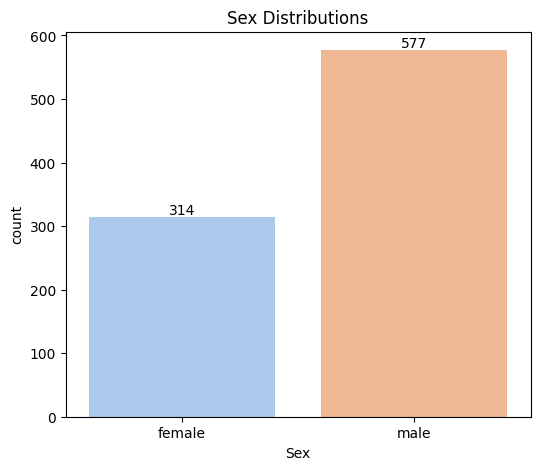

In [ ]:
plot_distribution(sex_dist, 'Sex', 'count', hue_col='Sex', title='Sex Distributions')

##### Deck Cabin

In [ ]:
deck_dist = df.groupby(['Deck']).agg(count=('Deck','count')).reset_index()
deck_dist

,Deck,count
0,A,11
1,B,25
2,C,30
3,D,23
4,E,26
5,F,12
6,G,4
7,T,1
8,Unknown,590


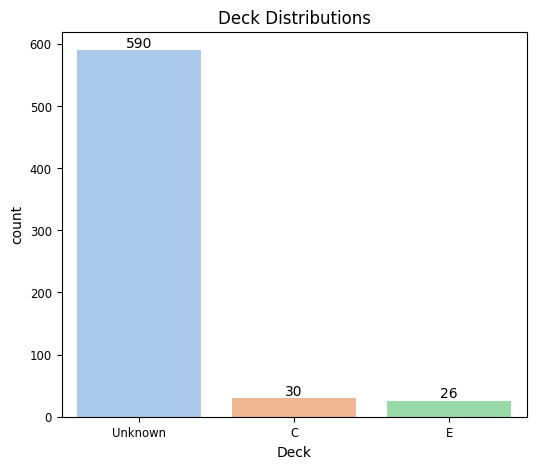

In [ ]:
plot_distribution(deck_dist.nlargest(3,'count'), 'Deck', 'count', hue_col='Deck', title='Deck Distributions')

##### Embarked

In [ ]:
emb_dist = df.groupby(['Embarked']).agg(count=('Embarked','count')).reset_index()
emb_dist

,Embarked,count
0,C,125
1,Q,69
2,S,528


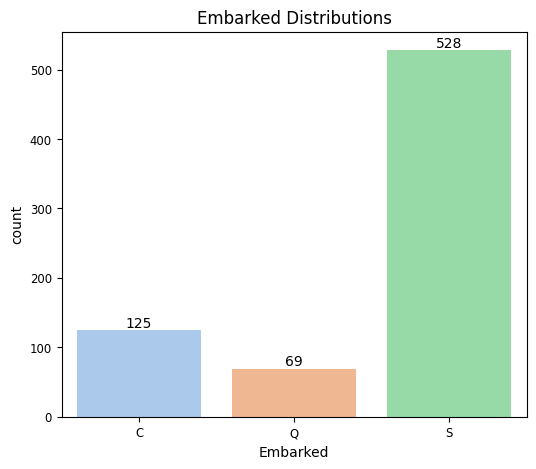

In [ ]:
plot_distribution(emb_dist, 'Embarked', 'count', hue_col='Embarked', title='Embarked Distributions')

#### Ticket Class

In [ ]:
class_dist = df.groupby(['Pclass']).agg(count=('Pclass','count')).reset_index()
class_dist

,Pclass,count
0,Lower,427
1,Middle,167
2,Upper,128


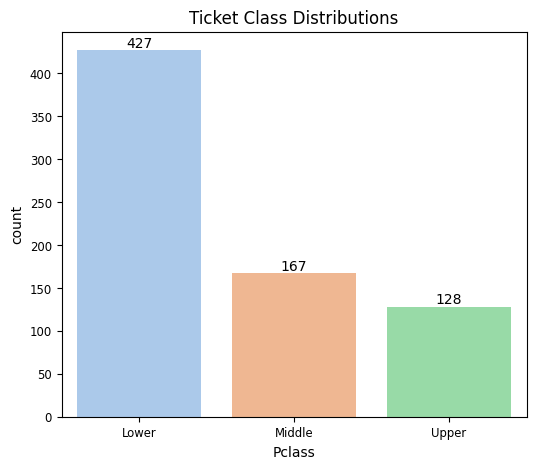

In [ ]:
plot_distribution(class_dist, 'Pclass', 'count', hue_col='Pclass', title='Ticket Class Distributions')

#### Survived

In [ ]:
sur_dist = df.groupby(['Survived']).agg(count=('Survived','count')).reset_index()
sur_dist

,Survived,count
0,0,447
1,1,275


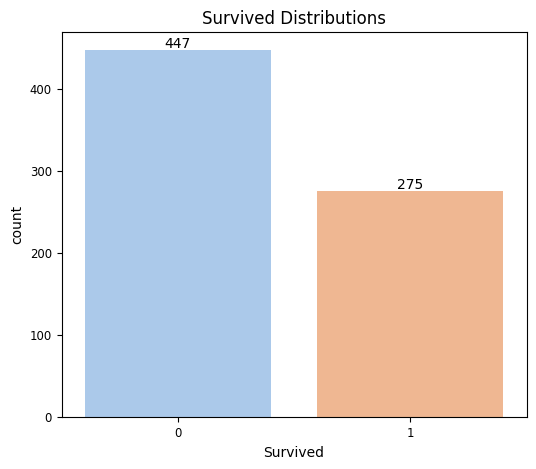

In [ ]:
plot_distribution(sur_dist, 'Survived', 'count', hue_col='Survived', title='Survived Distributions')

### Boxplot

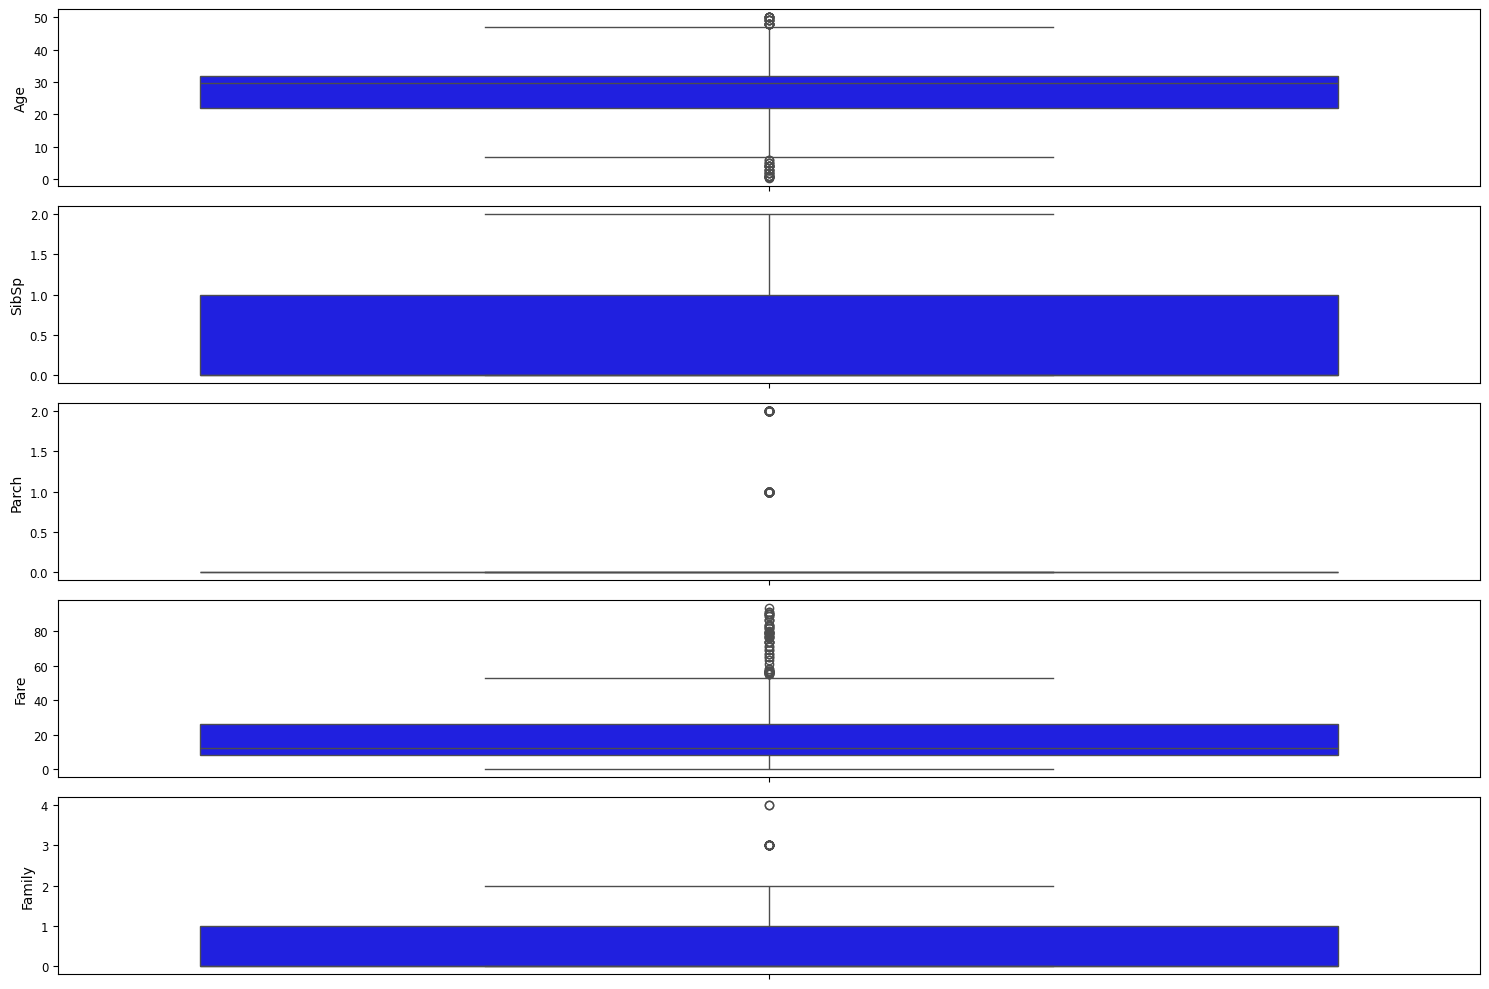

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(5, len(nums)//5, i+1)
    sns.boxplot(y=df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

### Dist plot

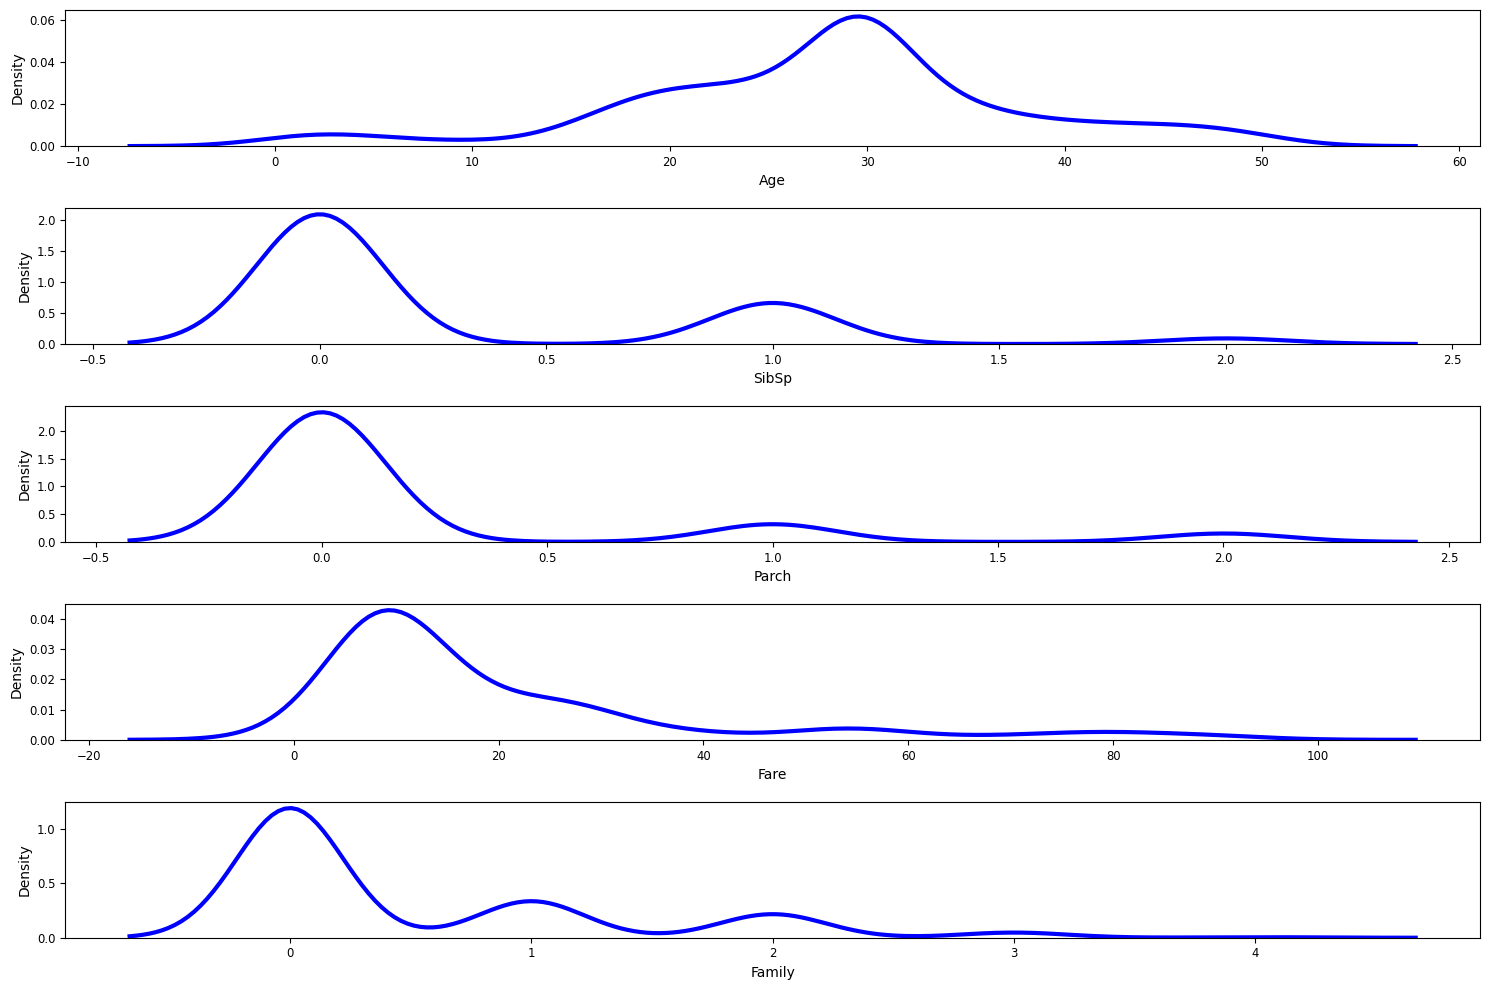

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(5, len(nums)//5, i+1)
    sns.kdeplot(df[nums[i]], color='blue')
    plt.tight_layout()

Based on the distribution plot visualization:
* The `SipSb`, `Parch`, `Fare` and `Family` columns are slightly *skewed*.
* This means there is a possibility that we will need to do something to these columns later
* Apart from those columns, the distribution looks quite symmetrical

## Bivariate Analysis

### Barplot

In [ ]:
def plot_dist_bivariat(data, x_col, y_col, hue_col=None, title=''):
    plt.figure(figsize=(7, 5))
    c1 = sns.barplot(y=y_col, x=x_col, data=data, hue=hue_col, palette='pastel', legend=True)
    for container in c1.containers:
        c1.bar_label(container)
    plt.title(title)
    plt.legend(title=hue_col)
    plt.show()

##### Sex - Survived

In [ ]:
sex_survived_dist = df.groupby(['Sex','Survived']).agg(count=('Survived','count')).reset_index()
sex_survived_dist

,Sex,Survived,count
0,female,0,56
1,female,1,180
2,male,0,391
3,male,1,95


In [ ]:
total = sex_survived_dist.groupby('Sex')['count'].sum()
sex_survived_dist['percentage'] = sex_survived_dist.apply(lambda row: round(row['count'] / total[row['Sex']] * 100), axis=1)
sex_survived_dist

,Sex,Survived,count,percentage
0,female,0,56,24
1,female,1,180,76
2,male,0,391,80
3,male,1,95,20


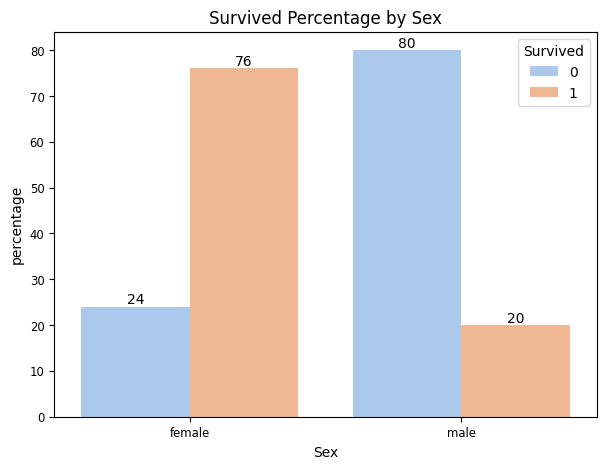

In [ ]:
plot_dist_bivariat(sex_survived_dist, 'Sex', 'percentage', hue_col='Survived', title='Survived Percentage by Sex')

##### Deck Cabin - Survived

In [ ]:
cabin_dist = df.groupby(['Deck','Survived']).agg(count=('Survived','count')).reset_index()
cabin_dist

,Deck,Survived,count
0,A,0,6
1,A,1,5
2,B,0,7
3,B,1,18
4,C,0,12
5,C,1,18
6,D,0,5
7,D,1,18
8,E,0,4
9,E,1,22


In [ ]:
total = cabin_dist.groupby('Deck')['count'].sum()
cabin_dist['percentage'] = cabin_dist.apply(lambda row: round(row['count'] / total[row['Deck']] * 100), axis=1)
cabin_dist

,Deck,Survived,count,percentage
0,A,0,6,55
1,A,1,5,45
2,B,0,7,28
3,B,1,18,72
4,C,0,12,40
5,C,1,18,60
6,D,0,5,22
7,D,1,18,78
8,E,0,4,15
9,E,1,22,85


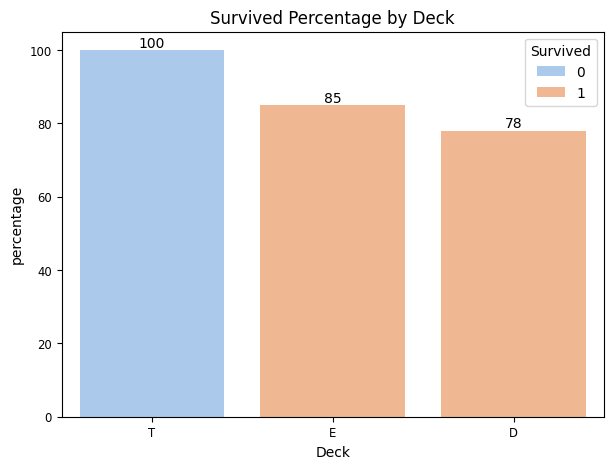

In [ ]:
plot_dist_bivariat(cabin_dist.nlargest(3,'percentage'), 'Deck', 'percentage', hue_col='Survived', title='Survived Percentage by Deck')

##### Embarked - Survived

In [ ]:
emb_dist = df.groupby(['Embarked','Survived']).agg(count=('Survived','count')).reset_index()
emb_dist

,Embarked,Survived,count
0,C,0,61
1,C,1,64
2,Q,0,39
3,Q,1,30
4,S,0,347
5,S,1,181


In [ ]:
total = emb_dist.groupby('Embarked')['count'].sum()
emb_dist['percentage'] = emb_dist.apply(lambda row: round(row['count'] / total[row['Embarked']] * 100), axis=1)
emb_dist

,Embarked,Survived,count,percentage
0,C,0,61,49
1,C,1,64,51
2,Q,0,39,57
3,Q,1,30,43
4,S,0,347,66
5,S,1,181,34


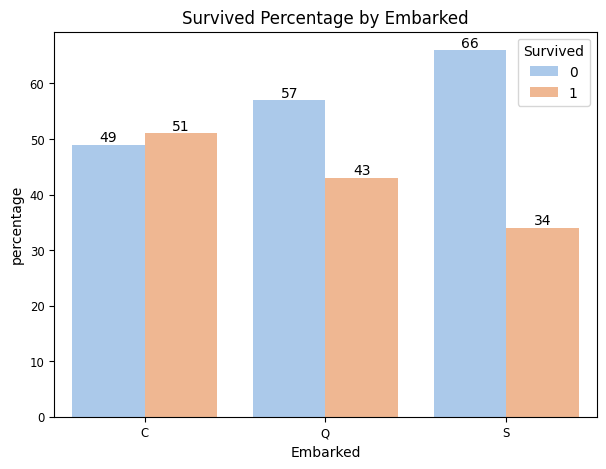

In [ ]:
plot_dist_bivariat(emb_dist, 'Embarked', 'percentage', hue_col='Survived', title='Survived Percentage by Embarked')

#### Ticket Class - Survived

In [ ]:
ticket_dist = df.groupby(['Pclass','Survived']).agg(count=('Survived','count')).reset_index()
ticket_dist

,Pclass,Survived,count
0,Lower,0,315
1,Lower,1,112
2,Middle,0,85
3,Middle,1,82
4,Upper,0,47
5,Upper,1,81


In [ ]:
total = ticket_dist.groupby('Pclass')['count'].sum()
ticket_dist['percentage'] =  ticket_dist.apply(lambda row: round(row['count'] / total[row['Pclass']] * 100), axis=1)
ticket_dist

,Pclass,Survived,count,percentage
0,Lower,0,315,74
1,Lower,1,112,26
2,Middle,0,85,51
3,Middle,1,82,49
4,Upper,0,47,37
5,Upper,1,81,63


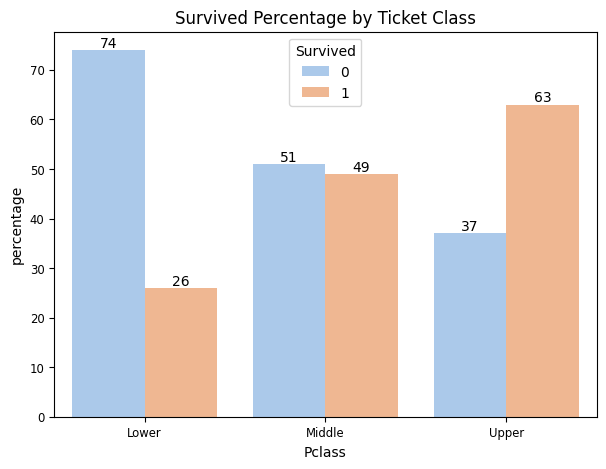

In [ ]:
plot_dist_bivariat(ticket_dist, 'Pclass', 'percentage', hue_col='Survived', title='Survived Percentage by Ticket Class')

#### SibSp ,Fare, Parch, Family - Survived

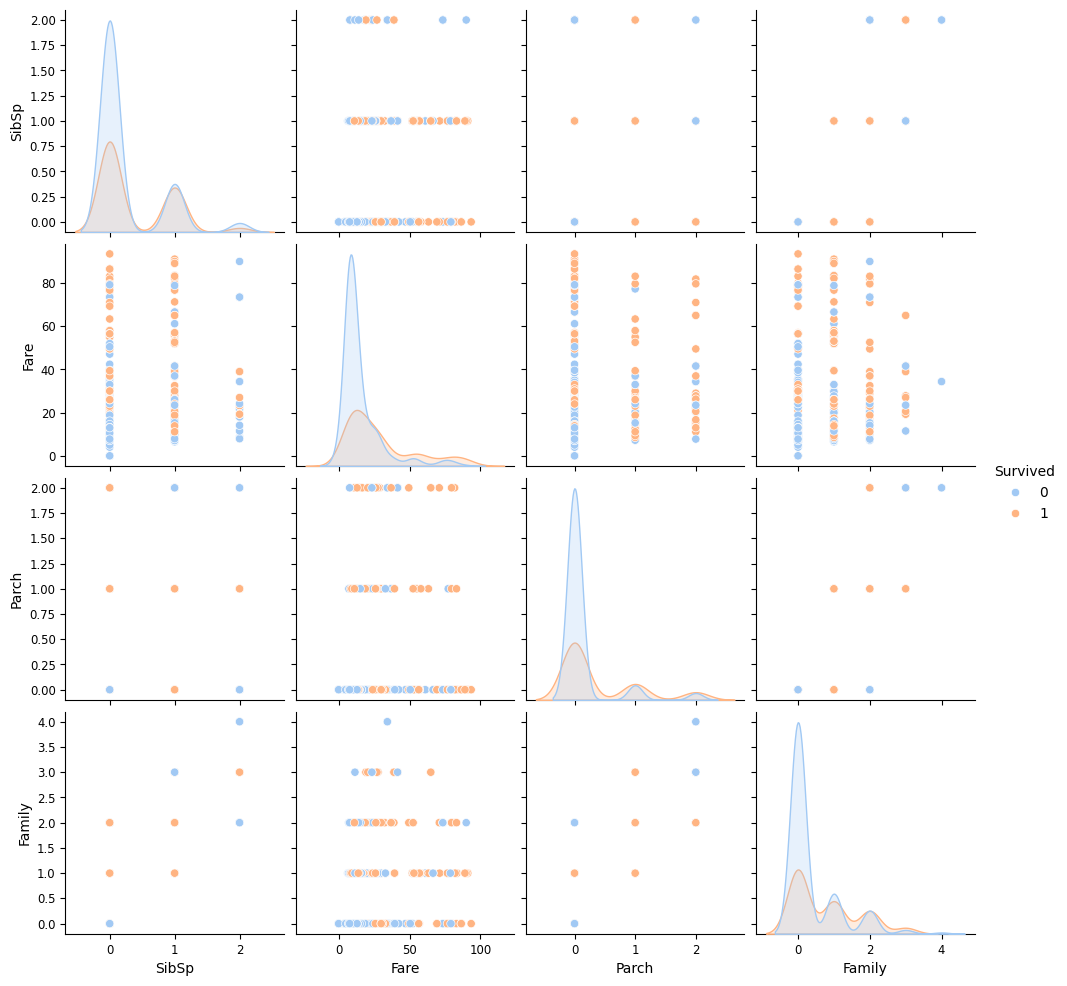

In [ ]:
sns.pairplot(df[['SibSp','Fare', 'Parch', 'Family', 'Survived']], hue = 'Survived', palette='pastel')

#### Correlation Heatmap

<Axes: >

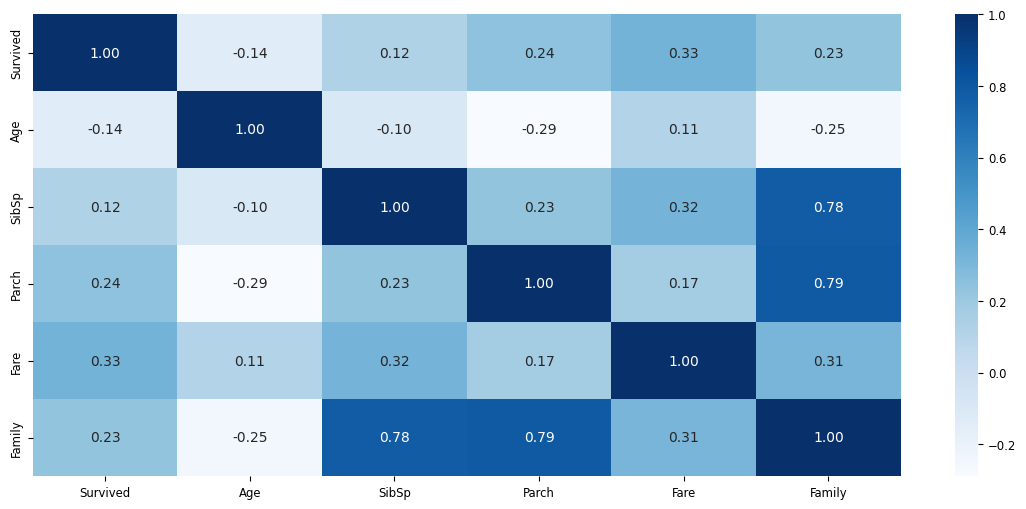

In [ ]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.corr(numeric_only=True),cmap='Blues',annot=True, fmt='.2f')

# Data Preprocessing

## Label Encoding

In [ ]:
cats_col = ['Pclass','Sex','Deck','Embarked']

In [ ]:
le = LabelEncoder()
for i in cats_col:
  df[i]=le.fit_transform(df[i])
  print(i)
  print(list(le.classes_))
  print(le.transform(list(le.classes_)))
  print()

Pclass
['Lower', 'Middle', 'Upper']
[0 1 2]

Sex
['female', 'male']
[0 1]

Deck
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Unknown']
[0 1 2 3 4 5 6 7 8]

Embarked
['C', 'Q', 'S']
[0 1 2]



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  722 non-null    int64  
 1   Pclass    722 non-null    int64  
 2   Sex       722 non-null    int64  
 3   Age       722 non-null    float64
 4   SibSp     722 non-null    int64  
 5   Parch     722 non-null    int64  
 6   Fare      722 non-null    float64
 7   Embarked  722 non-null    int64  
 8   Deck      722 non-null    int64  
 9   Family    722 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 62.0 KB


## OHE

In [ ]:
# df = pd.get_dummies(df, columns=['Sex'])
# df.info()

## Correlation Heatmap

<Axes: >

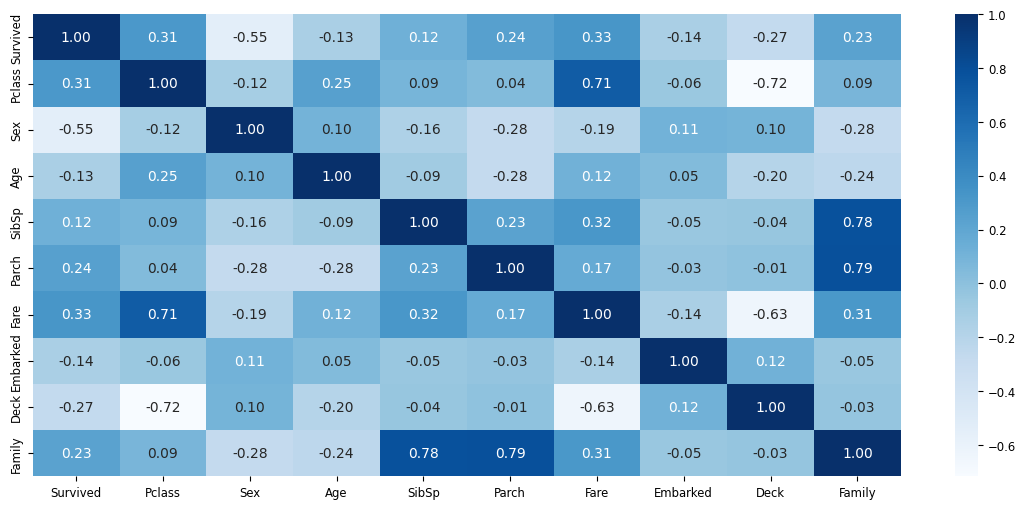

In [ ]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.corr(numeric_only=True),cmap='Blues',annot=True, fmt='.2f')

In [ ]:
df.corr().abs()['Survived'].sort_values(ascending=False)

Survived    1.000000
Sex         0.547923
Fare        0.329227
Pclass      0.305913
Deck        0.271704
Parch       0.242641
Family      0.233327
Age         0.139861
Embarked    0.135194
SibSp       0.122938
Name: Survived, dtype: float64

## Feature Selection

In [ ]:
df_final = df[['Pclass','Sex','Age','Fare','Embarked','Deck','Family','Survived']]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    722 non-null    int64  
 1   Sex       722 non-null    int64  
 2   Age       722 non-null    float64
 3   Fare      722 non-null    float64
 4   Embarked  722 non-null    int64  
 5   Deck      722 non-null    int64  
 6   Family    722 non-null    int64  
 7   Survived  722 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.8 KB


In [ ]:
df_final['Survived'].value_counts()

0    447
1    275
Name: Survived, dtype: int64

In [ ]:
X = df_final.drop('Survived', axis=1)
y = df_final['Survived']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Survived'])], axis=1)

# Menampilkan hasil
print("Before SMOTE:")
print(y.value_counts())
print("\nAfter SMOTE:")
print(df_resampled['Survived'].value_counts())

Before SMOTE:
0    447
1    275
Name: Survived, dtype: int64

After SMOTE:
0    447
1    447
Name: Survived, dtype: int64


In [ ]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    894 non-null    int64  
 1   Sex       894 non-null    int64  
 2   Age       894 non-null    float64
 3   Fare      894 non-null    float64
 4   Embarked  894 non-null    int64  
 5   Deck      894 non-null    int64  
 6   Family    894 non-null    int64  
 7   Survived  894 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 56.0 KB


# Modelling

## Normalization

In [ ]:
X = df_resampled.drop('Survived', axis=1)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

df_normalized = pd.DataFrame(X_normalized, columns=X.columns)
df_normalized['Survived'] = df_resampled['Survived']
df_normalized.head()

,Pclass,Sex,Age,Fare,Embarked,Deck,Family,Survived
0,0.0,1.0,0.435256,0.077540,1.0,1.00,0.25,0
1,1.0,0.0,0.757967,0.762388,0.0,0.25,0.25,1
2,0.0,0.0,0.515934,0.084759,1.0,1.00,0.00,1
3,1.0,0.0,0.697459,0.567914,1.0,0.25,0.25,1
4,0.0,1.0,0.697459,0.086096,1.0,1.00,0.00,0


In [ ]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    894 non-null    float64
 1   Sex       894 non-null    float64
 2   Age       894 non-null    float64
 3   Fare      894 non-null    float64
 4   Embarked  894 non-null    float64
 5   Deck      894 non-null    float64
 6   Family    894 non-null    float64
 7   Survived  894 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 56.0 KB


## Split Data

In [ ]:
X = df_normalized.drop('Survived', axis=1)
y = df_normalized['Survived']

# X = df_resampled.drop('Survived', axis=1)
# y = df_resampled['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set :", X_train.shape)
print("Test set:", X_test.shape)

Train set : (715, 7)
Test set: (179, 7)


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Initialize DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Make predictions
y_proba = dt.predict_proba(X_test)[:,1]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC: %.2f%%" %(roc_auc*100))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        85
           1       0.85      0.79      0.82        94

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179

ROC AUC: 82.75%
Confusion Matrix:
[[72 13]
 [20 74]]


## Random Forest

In [ ]:
# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Make predictions
y_proba = rf.predict_proba(X_test)[:,1]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC: %.2f%%" %(roc_auc*100))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        85
           1       0.87      0.82      0.84        94

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179

ROC AUC: 91.02%
Confusion Matrix:
[[73 12]
 [17 77]]


## XGBoost

In [ ]:
# Initialize XGBClassifier
xgb = XGBClassifier()

# Train the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Make predictions
y_proba = xgb.predict_proba(X_test)[:,1]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC: %.2f%%" %(roc_auc*100))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8435754189944135
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        85
           1       0.87      0.83      0.85        94

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179

ROC AUC: 91.23%
Confusion Matrix:
[[73 12]
 [16 78]]


## Naive Bayes

In [ ]:
# Initialize Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

# Make predictions
y_proba = nb.predict_proba(X_test)[:,1]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC: %.2f%%" %(roc_auc*100))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8324022346368715
              precision    recall  f1-score   support

           0       0.86      0.78      0.81        85
           1       0.81      0.88      0.85        94

    accuracy                           0.83       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179

ROC AUC: 83.42%
Confusion Matrix:
[[66 19]
 [11 83]]


## Logistic Regression

In [ ]:
# Initialize Gaussian Naive Bayes classifier
lr = LogisticRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Make predictions
y_proba = lr.predict_proba(X_test)[:,1]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC: %.2f%%" %(roc_auc*100))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8491620111731844
              precision    recall  f1-score   support

           0       0.86      0.81      0.84        85
           1       0.84      0.88      0.86        94

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.85      0.85      0.85       179

ROC AUC: 88.92%
Confusion Matrix:
[[69 16]
 [11 83]]


## ROC AUC Curve

In [ ]:
def plot_roc_curve(model, X_test, y_true):
    y_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_true, y_proba)

    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

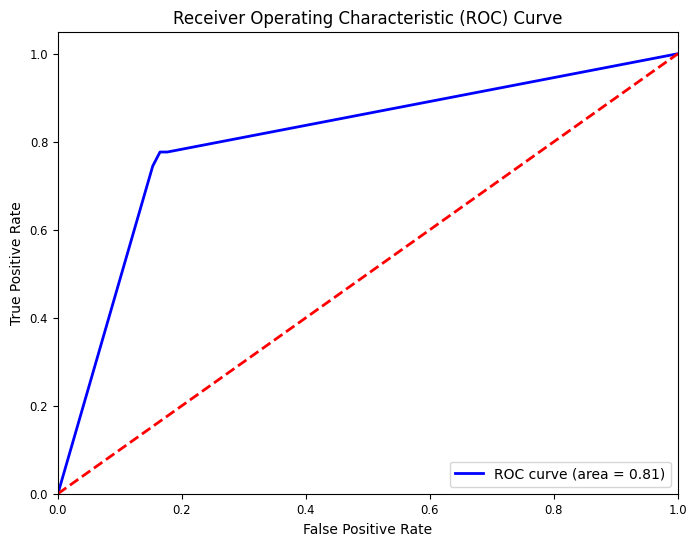

In [ ]:
plot_roc_curve(dt, X_test, y_test)

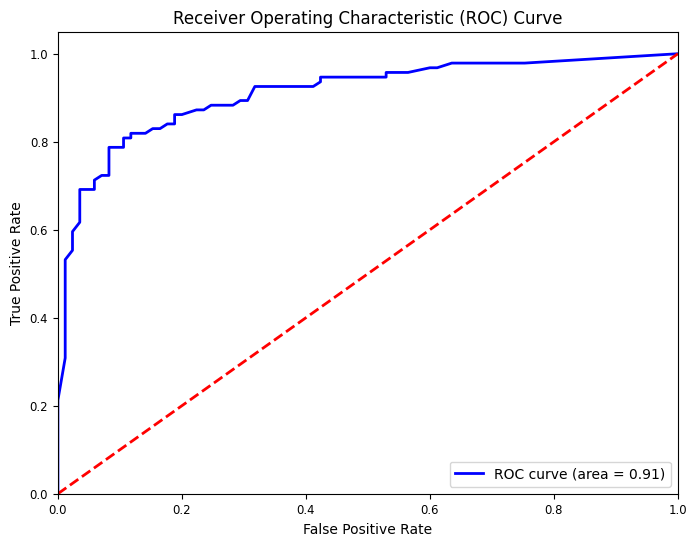

In [ ]:
plot_roc_curve(rf, X_test, y_test)

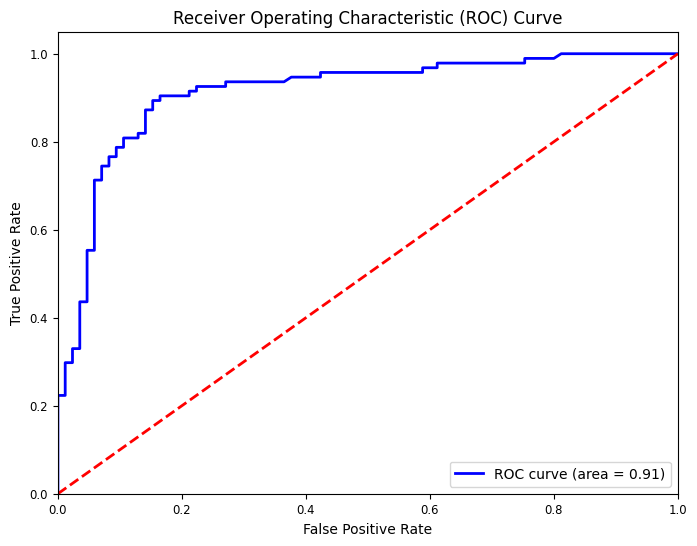

In [ ]:
plot_roc_curve(xgb, X_test, y_test)

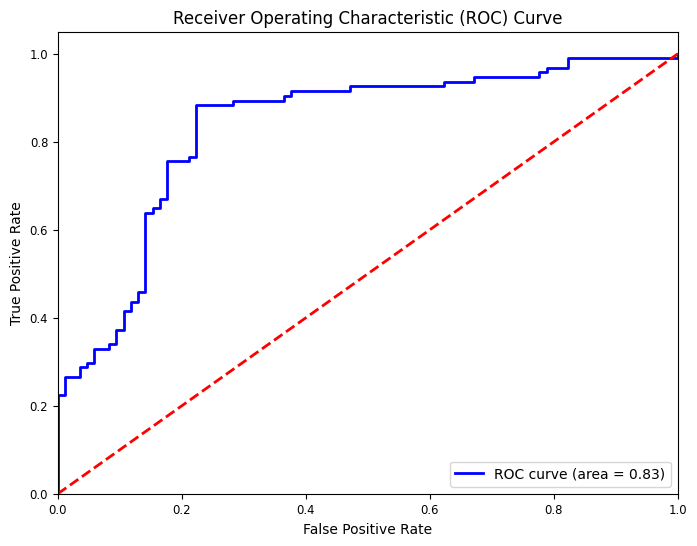

In [ ]:
plot_roc_curve(nb, X_test, y_test)

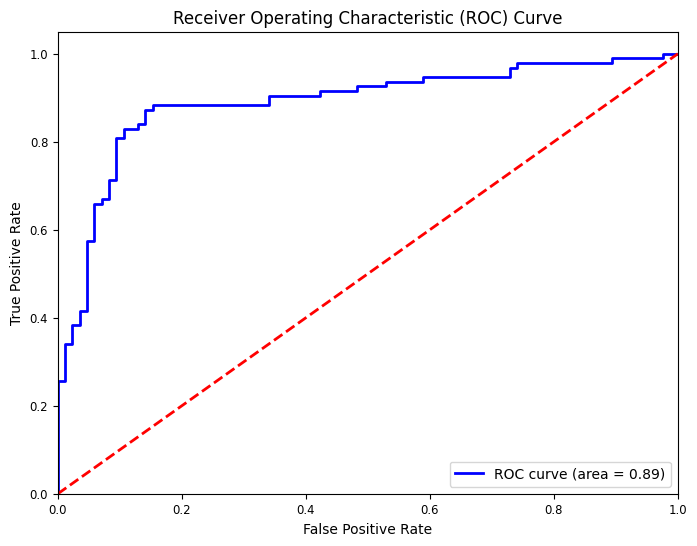

In [ ]:
plot_roc_curve(lr, X_test, y_test)